In [1]:
from pathlib import Path
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import librosa
import librosa.display
import matplotlib.image as mpimg
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)

Using cache found in C:\Users\ragha/.cache\torch\hub\pytorch_vision_v0.10.0


In [2]:
y, sr = librosa.load(r"C:\Users\ragha\Downloads\sample-3s.mp3")
whale_song, _ = librosa.effects.trim(y)

In [3]:
y.shape, whale_song.shape

((70464,), (70464,))

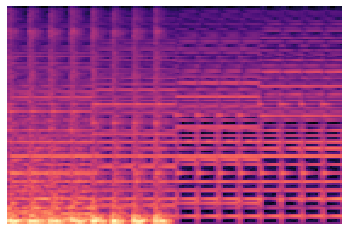

In [4]:
S = librosa.feature.melspectrogram(y=whale_song)
log_mel_spect = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(log_mel_spect, sr=sr);
plt.gca().set_axis_off()
plt.margins(0,0)
plt.savefig('mel1.jpg', bbox_inches='tight', pad_inches = 0)

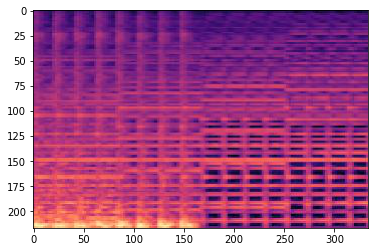

In [5]:
img = mpimg.imread('mel1.jpg')
plt.imshow(img)

In [6]:
img = np.reshape(img, (3, img.shape[0], img.shape[1]))
img.shape

(3, 217, 334)

In [7]:
tensor = torch.from_numpy(img)
tensor = tensor.float()
tensor = tensor.view(1, tensor.shape[0], tensor.shape[1], tensor.shape[2])
output = model(tensor)

In [8]:
output.shape

torch.Size([1, 1000])